<a href="https://colab.research.google.com/github/heet9022/Deep-Learning-Ntbks/blob/master/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *
import math
import numpy as np

Data preparation


In [0]:
def foo(x): return (x[:, 0]**3 - x[:, 1]**2 + x[:, 0]*x[:, 1])/math.sqrt(5)

In [0]:
def create_data():
  x = np.random.normal(size=(500,2))
  y = np.asarray(foo(x))
  return x, y

In [0]:
def plot3D(x, y):

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(x[:, 0], x[:, 1], y, c = 'b', marker='o')
  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_zlabel('Z-axis')

  plt.show()

In [0]:
x, y = create_data()

In [93]:
x.shape, y.shape

((500, 2), (500,))

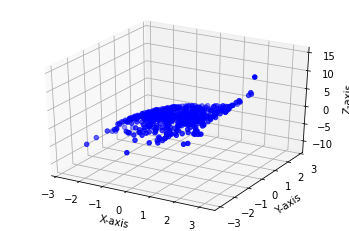

In [94]:
plot3D(x,y)

In [0]:
x, y = tensor(x).float(), tensor(y).float()

Lets make a neural network

In [0]:
input_size = x.shape[-1]
hidden_size = 10
output_size = 1

In [0]:
def MSE(y, y_hat): return ((y_hat - y)**2).mean()

In [0]:
def relu(x): return torch.max(tensor(0.), x)

In [0]:
def forward(x):
  z0 = relu(x@w0 + b0)
  z1 = (z0@w1 + b1)
  return z1

In [0]:
def update():

  y_hat = forward(x)
  loss = MSE(y_hat, y)
  if t % 10 == 0 : print(loss)
  loss.backward()
  with torch.no_grad():
        w0.sub_(lr * w0.grad)
        w0.grad.zero_()
        w1.sub_(lr * w1.grad)
        w1.grad.zero_()
        b0.sub_(lr * b0.grad)
        b0.grad.zero_()
        b1.sub_(lr * b1.grad)
        b1.grad.zero_()
  return loss  

Init parameters

In [0]:
w0 = nn.Parameter(torch.rand((input_size, hidden_size)))
w1 = nn.Parameter(torch.rand((hidden_size, output_size)))
b0 = nn.Parameter(torch.rand((hidden_size)))
b1 = nn.Parameter(torch.rand((output_size)))

In [139]:
y_hat = forward(x)
MSE(y, y_hat)

tensor(27.9328, grad_fn=<MeanBackward0>)

In [140]:
lr = 0.1
loss_log = []
for t in range(100): loss_log.append(update())

tensor(27.9328, grad_fn=<MeanBackward0>)


RuntimeError: ignored

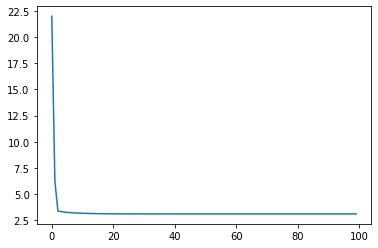

In [136]:
plt.plot(loss_log)

In [0]:
test = torch.ones((100, 2)).uniform_(-1, 1)
a = foo(test)
b = forward(test)

In [37]:
MSE(a, b)

tensor(0.5525, grad_fn=<MeanBackward0>)

In [0]:
test2 = tensor(1., 2)
# foo(test2)  

In [39]:
forward(test2)

tensor([0.0384], grad_fn=<AddBackward0>)

make a quick model using library

In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [0]:
class ANN(nn.Module):
  def __init__(self, n_features):
    super(ANN, self).__init__()
    self.layer1 = nn.Linear(n_features, 10)
    self.output = nn.Linear(10, 1)

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    return self.output(x)

In [0]:
model = ANN(x.shape[1])

In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [121]:
loss_values = []
for epoch in range(1000):
    y_pred = model(x)
    y_pred = torch.squeeze(y_pred)
    train_loss = MSE(y_pred, y)
    loss_values.append(train_loss)

    if epoch % 10 == 0:
      print(f'''epoch {epoch}
      Loss {train_loss}''')
    
    train_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

epoch 0
      Loss 4.366463661193848
epoch 10
      Loss 1.8032106161117554
epoch 20
      Loss 1.422054648399353
epoch 30
      Loss 1.1845600605010986
epoch 40
      Loss 1.076721429824829
epoch 50
      Loss 1.0115023851394653
epoch 60
      Loss 0.9472500681877136
epoch 70
      Loss 0.870956301689148
epoch 80
      Loss 0.7805783748626709
epoch 90
      Loss 0.6878260374069214
epoch 100
      Loss 0.6038604378700256
epoch 110
      Loss 0.5296403169631958
epoch 120
      Loss 0.4593435525894165
epoch 130
      Loss 0.3931378722190857
epoch 140
      Loss 0.3385142982006073
epoch 150
      Loss 0.2936587333679199
epoch 160
      Loss 0.2559434771537781
epoch 170
      Loss 0.2255234569311142
epoch 180
      Loss 0.20073306560516357
epoch 190
      Loss 0.18056842684745789
epoch 200
      Loss 0.16417647898197174
epoch 210
      Loss 0.1505812406539917
epoch 220
      Loss 0.13960732519626617
epoch 230
      Loss 0.1304844319820404
epoch 240
      Loss 0.12293055653572083
epoch 250


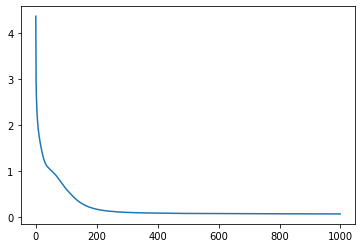

In [122]:
plt.plot(loss_values)

In [141]:
model(tensor(1., 2))

tensor([-0.9807], grad_fn=<AddBackward0>)

In [142]:
y_pred[1], y[1]

(tensor(-0.0494, grad_fn=<SelectBackward>), tensor(-0.3454))